In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
imagepaths=[]
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if path.endswith('png'):
            imagepaths.append(path)
print(len(imagepaths))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

40000


In [2]:
# Tensorflow And Kerras
import tensorflow as tf
from tensorflow import keras
#Import of keras model and hidden layers for our convolutional network
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
#Image handling libraries
import matplotlib.pyplot as plt
import cv2
from PIL import Image
#Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [3]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('../input/leapgestrecog/leapGestRecog/00/'):
     if not j.startswith('.'):# If running this code locally, this is to 
                              # ensure you aren't reading in hidden folders
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup


{'02_l': 0,
 '04_fist_moved': 1,
 '09_c': 2,
 '10_down': 3,
 '06_index': 4,
 '08_palm_moved': 5,
 '07_ok': 6,
 '05_thumb': 7,
 '01_palm': 8,
 '03_fist': 9}

Now We Have tried to see the image of the folder.At first we need to convert the image  to numpy array.

In [4]:
x_data = []
y_data = []
datacount = 0 # We'll use this to tally how many images are in our dataset
for i in range(0, 10): # Loop over the ten top-level folders
    for j in os.listdir('../input/leapgestrecog/leapGestRecog/0' + str(i) + '/'):
        if not j.startswith('.'): # Again avoid hidden folders
            count = 0 # To tally images of a given gesture
            for k in os.listdir('../input/leapgestrecog/leapGestRecog/0' + 
                                str(i) + '/' + j + '/'):
                                # Loop over the images
                img = Image.open('../input/leapgestrecog/leapGestRecog/0' + 
                                 str(i) + '/' + j + '/' + k).convert('L')
                                # Read in and convert to greyscale
                img = img.resize((320, 120))
                arr = np.array(img)
                x_data.append(arr) 
                count = count + 1
            y_values = np.full((count, 1), lookup[j]) 
            y_data.append(y_values)
            datacount = datacount + count
x_data = np.array(x_data, dtype = 'float32')
y_data = np.array(y_data)
y_data = y_data.reshape(datacount, 1) # Reshape to be the correct size
print(x_data)

[[[ 6.  5.  5. ...  5.  5.  5.]
  [ 6.  5.  5. ...  5.  4.  5.]
  [ 6.  6.  5. ...  5.  5.  5.]
  ...
  [ 6.  5.  5. ...  6.  6.  5.]
  [ 5.  5.  6. ...  4.  5.  5.]
  [ 5.  6.  5. ... 28.  8. 10.]]

 [[ 6.  5.  6. ...  5.  4.  5.]
  [ 6.  6.  6. ...  5.  4.  4.]
  [ 6.  6.  5. ...  5.  4.  4.]
  ...
  [ 6.  6.  5. ...  6.  5.  6.]
  [ 5.  5.  5. ...  4.  6.  6.]
  [ 5.  5.  5. ... 30.  9. 10.]]

 [[ 5.  5.  5. ...  5.  4.  4.]
  [ 5.  6.  5. ...  5.  5.  4.]
  [ 5.  5.  5. ...  4.  4.  4.]
  ...
  [ 5.  5.  5. ...  6.  5.  5.]
  [ 6.  6.  5. ...  3.  5.  5.]
  [ 6.  5.  5. ... 28.  7. 10.]]

 ...

 [[ 5.  5.  5. ...  3.  4.  4.]
  [ 5.  6.  5. ...  4.  4.  4.]
  [ 5.  5.  5. ...  4.  4.  4.]
  ...
  [ 5.  5.  5. ...  3.  4.  4.]
  [ 5.  4.  4. ...  2.  4.  3.]
  [ 5.  4.  4. ... 27.  6. 10.]]

 [[ 4.  4.  4. ...  3.  4.  4.]
  [ 4.  4.  4. ...  4.  4.  4.]
  [ 4.  4.  4. ...  4.  3.  3.]
  ...
  [ 4.  5.  4. ...  4.  4.  3.]
  [ 4.  4.  4. ...  2.  3.  3.]
  [ 4.  4.  5. ... 29.  6.  

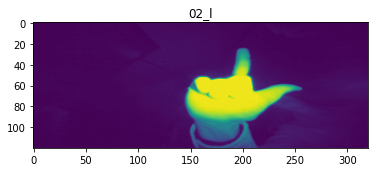

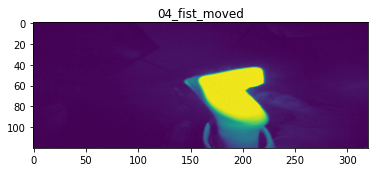

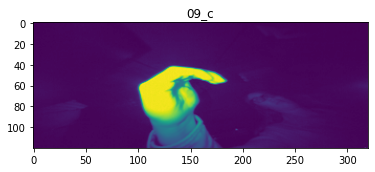

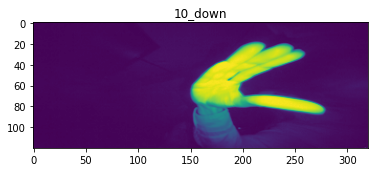

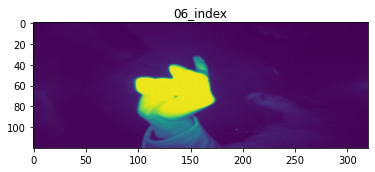

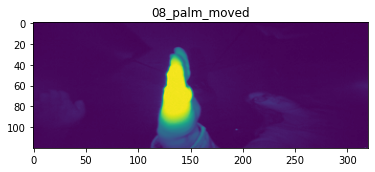

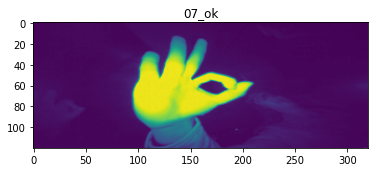

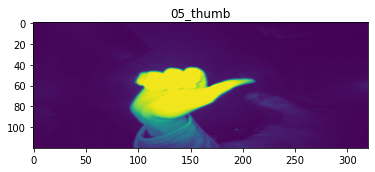

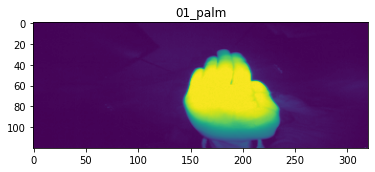

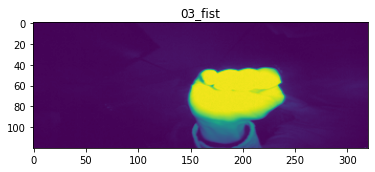

In [5]:
for i in range(0, 10):
    plt.imshow(x_data[i*200 , :, :])
    plt.title(reverselookup[y_data[i*200 ,0]])
    plt.show()
    

In [6]:
from keras.utils import to_categorical
y_data = to_categorical(y_data)


In [7]:
x_data = x_data.reshape((datacount, 120, 320, 1))
x_data /= 255

In [8]:
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.3)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [9]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(120, 320, 1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))




In [10]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Epoch 1/10
219/219 [==============================] - 44s 178ms/step - loss: 0.7151 - accuracy: 0.7707 - val_loss: 0.0197 - val_accuracy: 0.9947
Epoch 2/10
219/219 [==============================] - 37s 167ms/step - loss: 0.0095 - accuracy: 0.9982 - val_loss: 8.5623e-04 - val_accuracy: 0.9997
Epoch 3/10
219/219 [==============================] - 36s 167ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 1.7889e-04 - val_accuracy: 1.0000
Epoch 4/10
219/219 [==============================] - 36s 166ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 3.8197e-04 - val_accuracy: 0.9997
Epoch 5/10
219/219 [==============================] - 36s 166ms/step - loss: 2.2949e-04 - accuracy: 0.9999 - val_loss: 0.0027 - val_accuracy: 0.9997
Epoch 6/10
219/219 [==============================] - 36s 166ms/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 1.6875e-04 - val_accuracy: 1.0000
Epoch 7/10
219/219 [==============================] - 36s 166ms/step - loss: 6.1316e-04 - accuracy: 0.9998 - v

In [11]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

94/94 [==============================] - 7s 65ms/step - loss: 7.4099e-07 - accuracy: 1.0000
Accuracy:1.0
